<a href="https://colab.research.google.com/github/AlaaIraqy/machine_learning_problems/blob/main/sheet5_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content')
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=c88489d5a2c610292c791c191206ba9a55b1ae7f11d0b5527a6c0517c1be79ca
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamed99ayman","key":"ae3067e356d2194f37db76ae8c3d45d4"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           6844        609  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4093        343  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1370        120  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
import os
os.chdir('/content')
! kaggle datasets download kasikrit/att-database-of-faces

  0% 0.00/3.61M [00:00<?, ?B/s]
100% 3.61M/3.61M [00:00<00:00, 179MB/s]


In [ ]:
 os.chdir('/content')
 ! mkdir ORL
 ! unzip att-database-of-faces.zip -d ORL


Archive:  att-database-of-faces.zip
  inflating: ORL/README              
  inflating: ORL/s1/1.pgm            
  inflating: ORL/s1/10.pgm           
  inflating: ORL/s1/2.pgm            
  inflating: ORL/s1/3.pgm            
  inflating: ORL/s1/4.pgm            
  inflating: ORL/s1/5.pgm            
  inflating: ORL/s1/6.pgm            
  inflating: ORL/s1/7.pgm            
  inflating: ORL/s1/8.pgm            
  inflating: ORL/s1/9.pgm            
  inflating: ORL/s10/1.pgm           
  inflating: ORL/s10/10.pgm          
  inflating: ORL/s10/2.pgm           
  inflating: ORL/s10/3.pgm           
  inflating: ORL/s10/4.pgm           
  inflating: ORL/s10/5.pgm           
  inflating: ORL/s10/6.pgm           
  inflating: ORL/s10/7.pgm           
  inflating: ORL/s10/8.pgm           
  inflating: ORL/s10/9.pgm           
  inflating: ORL/s11/1.pgm           
  inflating: ORL/s11/10.pgm          
  inflating: ORL/s11/2.pgm           
  inflating: ORL/s11/3.pgm           
  inflating: O

In [ ]:
import os
from skimage.io import imread
import numpy as np
os.chdir('/content/ORL')
directory = os.getcwd()
files=os.listdir(directory)
files.remove('README')
# files.remove('.ipynb_checkpoints')
# files.remove('kaggle.json')
files = sorted(files, key=lambda x: int(x[1:]))
Dataset=[]
y=[]
 
Y=0
 
for filename in files:
    Y+=1
    each_file=os.listdir(filename)
    each_file.sort()
    each_file = sorted(each_file, key=lambda x: int(x[:-4]))
    for image in each_file:
      img = imread(os.getcwd()+'/'+filename+'/'+image)
      Dataset.append(img.flatten())
      y.append(Y)
 
y=np.array(y)
Dataset=np.array(Dataset)
print(np.shape(y))

(400,)


Splitting dataset

In [ ]:
train_x=Dataset[::2]
train_y=y[::2]
test_x=Dataset[1::2]
test_y=y[1::2]
print(np.shape(train_x))
print(np.shape(train_y))
print(np.shape(test_x))
print(np.shape(test_y))

(200, 10304)
(200,)
(200, 10304)
(200,)


Naive bayes

Accuracy: 0.735
[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 1]]


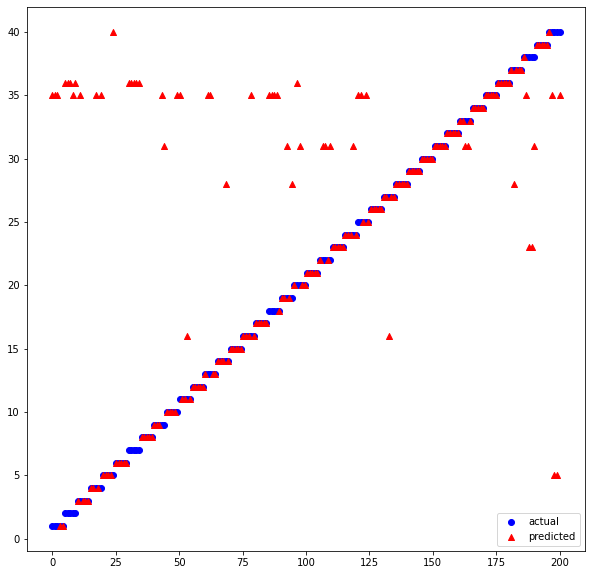

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

gnb = GaussianNB()
gnb.fit(train_x, train_y)
y_pred = gnb.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
confusionMatrix=confusion_matrix(test_y, y_pred)
print(confusionMatrix)
x=np.linspace(0,200,200)
plt.figure(figsize=(10, 10))
plt.scatter(x,test_y,color='blue',label='actual')
plt.scatter(x,y_pred,color='red',label='predicted',marker='^')
plt.legend()
plt.show()

PCA naive classifier

In [ ]:
cardinality = 10/200 #constant for all classes, 200 is the length of training set
priorP = np.ones(40) * 4/100
print(np.shape(priorP))
means=np.mean(train_x.T,axis=0)
print(means)
means=means[::10]
print(means)
cov=np.cov(train_x.T)
print(np.shape(cov))
eigenVal,eigenVec=np.linalg.eigh(cov.T)
idx = eigenVal.argsort()[::-1]
eigenVal = eigenVal[idx]
eigenVec = eigenVec[:,idx]
print(eigenVal)


(40,)
[128.33821817 132.59549689 142.77348602 134.47991071 134.24048913
 111.99349767 111.53736413 113.69293478 114.42138975 112.1248059
 111.9847632  113.19167314 115.78775233 116.97340839 118.23068711
 114.42430124 114.33569488 123.01067547 121.03610248 114.21642081
 125.56677019 127.31599379 137.80755047 124.86898292 134.25087345
 129.81521739 130.34559394 141.79658385 141.26019022 143.38421972
 110.86684783 114.25262034 116.0773486  112.91401398 111.05260093
 114.50067935 123.61422748 127.14732143 113.37626165 120.25087345
 109.13169643 109.63004658 113.77950311 114.30386258 114.17449534
  95.10277562  99.85685171 110.32065217 103.88053183 105.37160326
 100.02309783 103.75300854 106.94633152 100.62237966 104.1421778
 129.7804736  116.24737966 115.69574922 114.27998835 124.22243789
 125.21477096 131.76513975 128.97952252 132.20477484 128.95749224
 106.48913043 106.90285326 104.97932842 100.10238742  95.02241848
 111.39343944 110.01746894 113.44613742 114.29241071 113.35568711
 102.6